In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPooling2D
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

classifier = Sequential()

# 1st model

classifier.add(Convolution2D(512, (3, 3), input_shape=(64, 64, 3), activation='relu',strides=(3,3)))

classifier.add(MaxPooling2D(pool_size=(3, 3)))

classifier.add(Convolution2D(256, (2, 2), activation='relu'))

classifier.add(MaxPooling2D(pool_size=(1, 1)))

classifier.add(Flatten())

classifier.add(Dense(units=64, activation='relu'))

classifier.add(Dense(units=2, activation='softmax'))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)
print("\nTraining the data...\n")
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Pneumonia/CODE/data/train',
                                                 target_size=(64,64),
                                                 batch_size=12,
                                                 class_mode='categorical'
                                                 )

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Pneumonia/CODE/data/test',
                                            target_size=(64,64),
                                            batch_size=12,
                                            class_mode='categorical'
                                            )
print("\n Testing the data.....\n")

history=classifier.fit_generator(training_set,steps_per_epoch =100,epochs = 10,validation_data = test_set,verbose = 1)

plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['accuracy'],'r',label='training accuracy',color='green')
plt.plot(history.history['val_accuracy'],label='validation accuracy',color='red')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['loss'],'r',label='training loss',color='green')
plt.plot(history.history['val_loss'],label='validation loss',color='red')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


vgg_acc=history.history['val_accuracy'][-1]
print(vgg_acc)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Training the data...

Found 5266 images belonging to 2 classes.
Found 624 images belonging to 2 classes.

 Testing the data.....



<ipython-input-21-88fc7c19cd3d>:53: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=classifier.fit_generator(training_set,steps_per_epoch =100,epochs = 10,validation_data = test_set,verbose = 1)


Epoch 1/10
  2/100 [..............................] - ETA: 7:14 - loss: 0.7532 - accuracy: 0.5000

KeyboardInterrupt: ignored

In [ ]:
import numpy as np

preds = model.predict(test_set)
y_pred = np.argmax(preds, axis=1)



25/25 [==============================] - 32s 1s/step


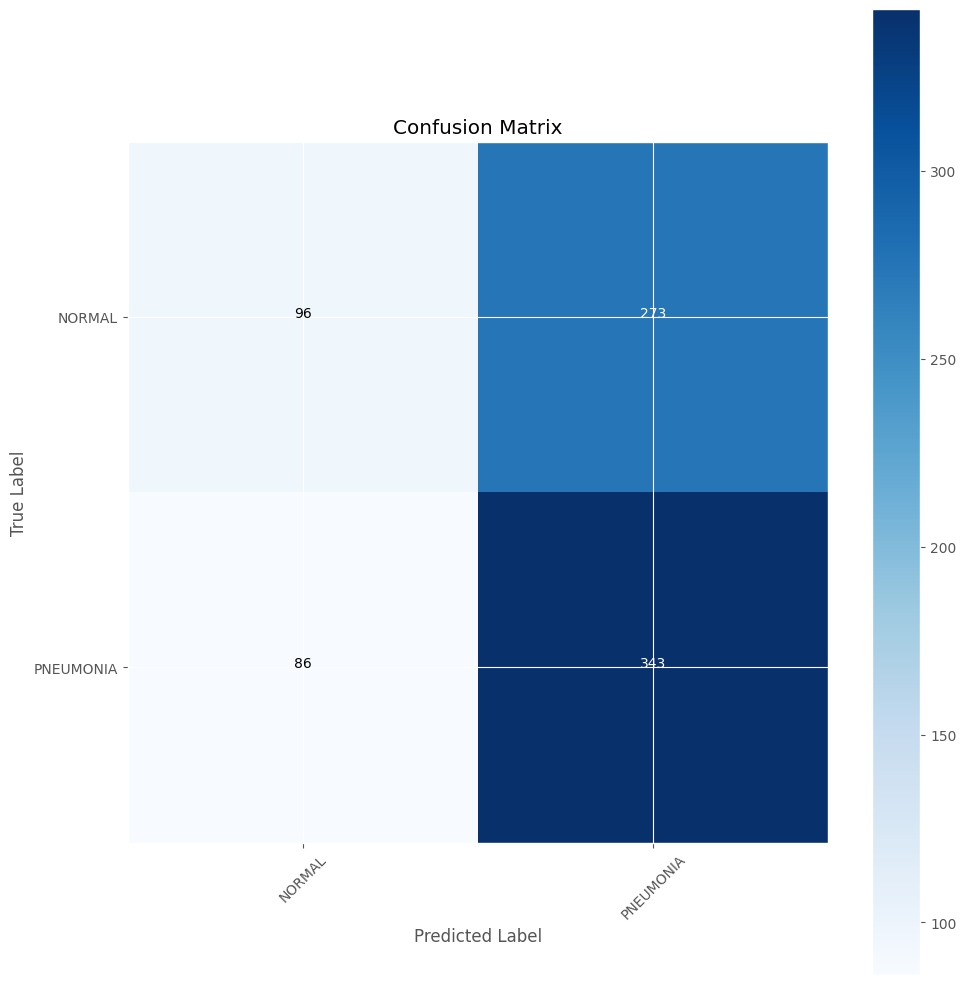

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

g_dict = test_set.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_set.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
print(classification_report(test_set.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      NORMAL       0.53      0.26      0.35       369
   PNEUMONIA       0.56      0.80      0.66       429

    accuracy                           0.55       798
   macro avg       0.54      0.53      0.50       798
weighted avg       0.54      0.55      0.51       798



# **Mobilenet Model**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5965 images belonging to 2 classes.
Found 798 images belonging to 2 classes.


<ipython-input-22-ed02ba812c36>:49: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_generator,


Epoch 1/10
20/20 [==============================] - 112s 5s/step - loss: 0.6594 - accuracy: 0.8297
Epoch 2/10
20/20 [==============================] - 88s 5s/step - loss: 0.1533 - accuracy: 0.9388
Epoch 3/10
20/20 [==============================] - 90s 5s/step - loss: 0.1333 - accuracy: 0.9516
Epoch 4/10
20/20 [==============================] - 94s 5s/step - loss: 0.0949 - accuracy: 0.9609
Epoch 5/10
20/20 [==============================] - 92s 5s/step - loss: 0.0863 - accuracy: 0.9656
Epoch 6/10
20/20 [==============================] - 91s 5s/step - loss: 0.0737 - accuracy: 0.9734
Epoch 7/10
20/20 [==============================] - 89s 4s/step - loss: 0.1191 - accuracy: 0.9594
Epoch 8/10
20/20 [==============================] - 91s 5s/step - loss: 0.0771 - accuracy: 0.9797
Epoch 9/10
20/20 [==============================] - 93s 5s/step - loss: 0.0559 - accuracy: 0.9797
Epoch 10/10
20/20 [==============================] - 90s 5s/step - loss: 0.0590 - accuracy: 0.9797


<ipython-input-22-ed02ba812c36>:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(history.history['accuracy'],'r',label='training accuracy',color='green')


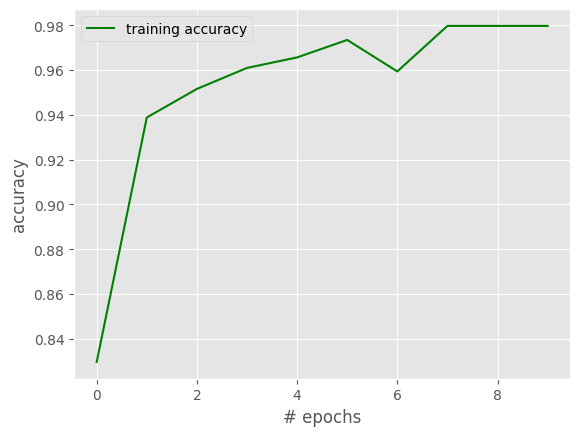

<ipython-input-22-ed02ba812c36>:66: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(history.history['loss'],'r',label='training loss',color='green')


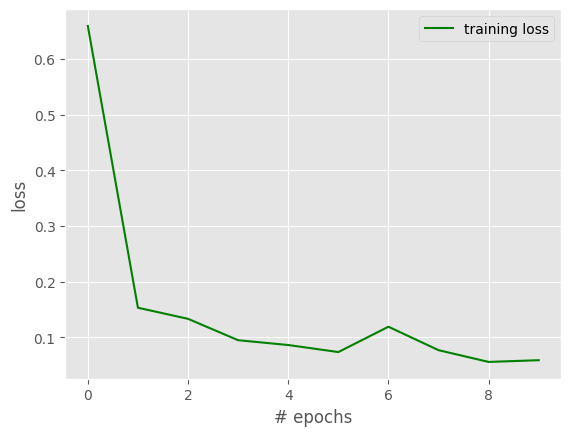

0.979687511920929


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.optimizers import Adam, SGD

from google.colab import drive
drive.mount('/content/drive')

base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=preds)

#for i,layer in enumerate(model.layers): print(i,layer.name)

for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/Pneumonia/CODE/data1/train',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 )

test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Pneumonia/CODE/data1/test',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical',
                                            )


model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit_generator(generator=train_generator,
                   steps_per_epoch=20,
                   epochs=10)

from matplotlib import pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['accuracy'],'r',label='training accuracy',color='green')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['loss'],'r',label='training loss',color='green')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

vgg_acc=history.history['accuracy'][-1]
print(vgg_acc)

25/25 [==============================] - 32s 1s/step


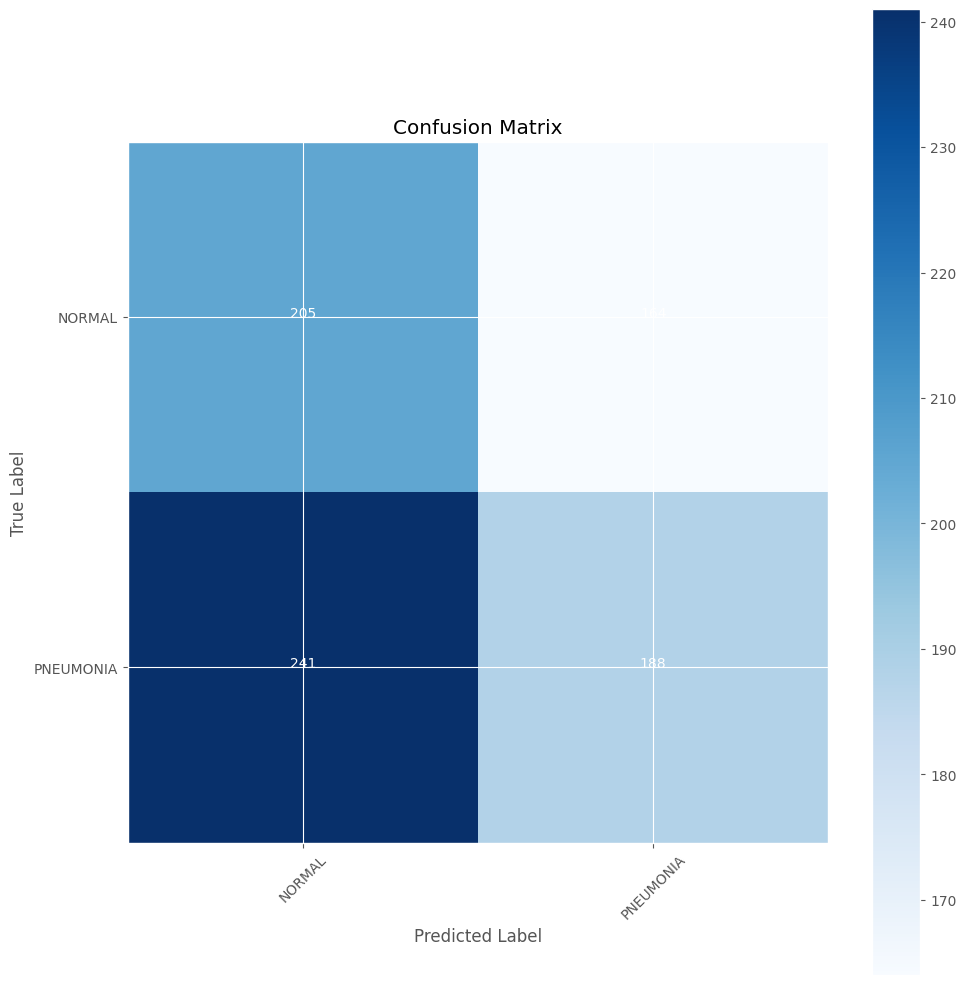

In [ ]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

preds = model.predict(test_set)
y_pred = np.argmax(preds, axis=1)


g_dict = test_set.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_set.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()


In [ ]:
print(classification_report(test_set.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      NORMAL       0.46      0.56      0.50       369
   PNEUMONIA       0.53      0.44      0.48       429

    accuracy                           0.49       798
   macro avg       0.50      0.50      0.49       798
weighted avg       0.50      0.49      0.49       798

